# Initialization

In [1]:
#Import all the UTILITY functions
from UTILITY_quickstart import *

#Look at the signature and documentation for initializeTao()
?initializeTao

Signature:
initializeTao(
    filePath=None,
    lastTrackedElement='end',
    csrTF=False,
    inputBeamFilePathSuffix=None,
    numMacroParticles=None,
    loadDefaultLatticeTF=True,
    defaultsFile=None,
    runImpactTF=False,
    scratchPath=None,
    randomizeFileNames=False,
    transverseWakes=False,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/Documents/SLAC/FACET2-S2E/UTILITY_quickstart.py
Type:      function

In [2]:
#Load a default configuration
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

#Initialize tao object
tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    numMacroParticles = 1e4,
    csrTF = False
)

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /Users/nmajik/Documents/SLAC/FACET2-S2E/beams/activeBeamFile.h5, and reinit to tao


# Track beam

In [3]:
#Track the beam from start to end
trackBeam(tao, **importedDefaultSettings)

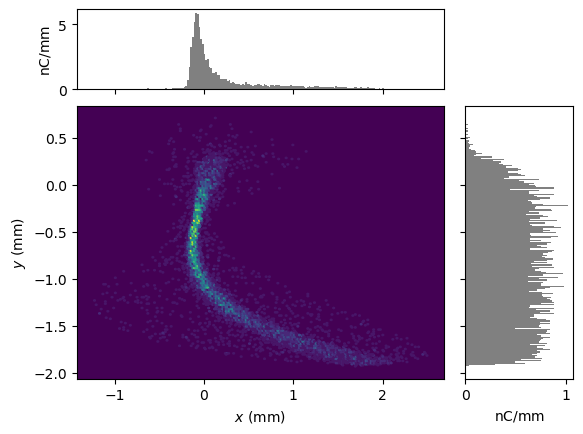

ParticleGroup with 9996 particles with total charge 1.599360000000001e-09 C


<Figure size 640x480 with 0 Axes>

In [4]:
#Get the beam at element "DTOTR"
P =  getBeamAtElement(tao, "DTOTR")

#Plot the x-y projection of the beam at that location
display(plotMod(P, 'x', 'y',  bins=200));
plt.clf()

print(P)

# Change a quad setting and retrack

In [5]:
#Set the strength of a final focus quad named Q0FF to zero kilogauss 
setQuadkG(tao, "Q0FF", 0)

#Track the beam through the now modified lattice
trackBeam(tao, **importedDefaultSettings)

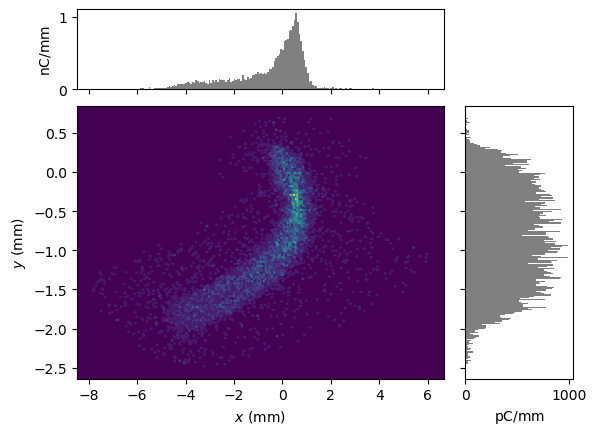

In [6]:
P =  getBeamAtElement(tao, "DTOTR")

display(plotMod(P, 'x', 'y',  bins=200));

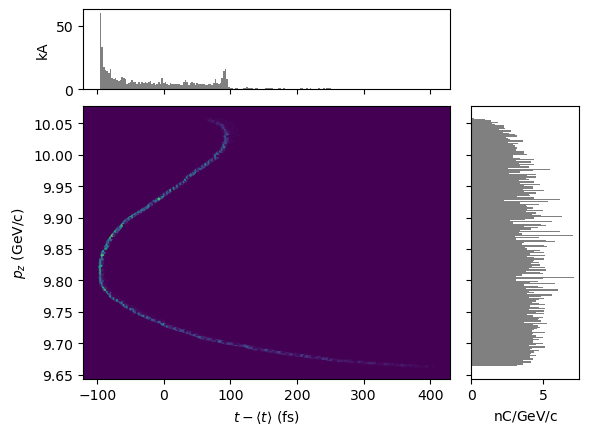

In [7]:
#Get the beam at the element MFFF, at the exit of BC20
P =  getBeamAtElement(tao,"MFFF")

#Plot the longitudinal phase space
display(plotMod(P, 'delta_t', 'pz',  bins=200));

# Change L2 phase and retrack

In [8]:
#Change the phase of L2 to -10 degrees
setLinacPhase(tao, "L2", -10)
trackBeam(tao, **importedDefaultSettings)

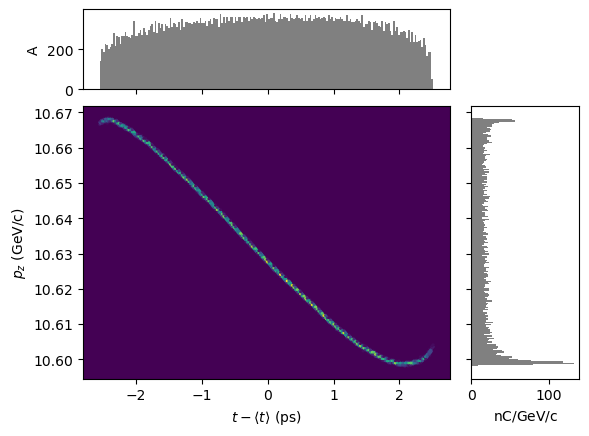

In [9]:
P =  getBeamAtElement(tao, "MFFF")


display(plotMod(P, 'delta_t', 'pz',  bins=200));
plt.clf();

# Example phase scan

In [10]:
#There are more efficient ways to do this, but here's a toy example of doing a phase scan and looking at how it impacts the final beam energy

results = {"phase": [], "energy": []}
for L2PhaseSet in np.arange(-40, 10, 5):
    setLinacPhase(tao, "L2", L2PhaseSet)
    trackBeam(tao)
    P =  getBeamAtElement(tao, "MFFF")
    #results.append([L2PhaseSet, P["mean_energy"]])
    results["phase"].append(L2PhaseSet)
    results["energy"].append(P["mean_energy"])
    print([L2PhaseSet, P["mean_energy"]])

[-40, 9509975415.99498]
[-35, 9767808757.438255]
[-30, 9999582271.935041]
[-25, 10215460298.108595]
[-20, 10391235433.222929]
[-15, 10529433701.61389]
[-10, 10630007679.484879]
[-5, 10692586034.617378]
[0, 10716902711.986902]
[5, 10702905857.304785]


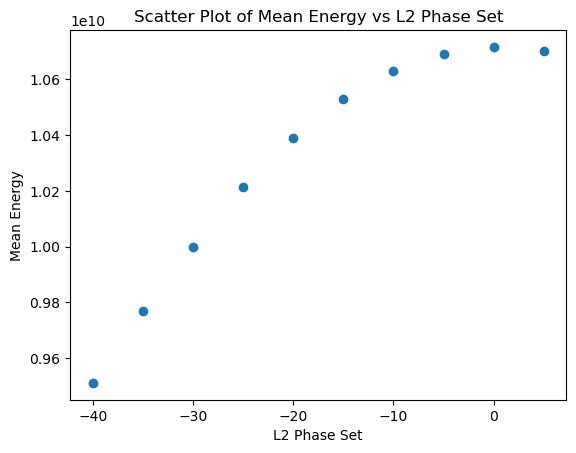

In [11]:
plt.scatter(results["phase"], results["energy"])

# Adding title and labels
plt.title('Scatter Plot of Mean Energy vs L2 Phase Set')
plt.xlabel('L2 Phase Set')
plt.ylabel('Mean Energy')

# Display the plot
plt.show()